# Import and read data


In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


In [3]:
df = pd.read_csv('bank_rfm_dataset_10k_fixed.csv')

# rfm analysis

In [5]:
# Начну с преобразования transaction_date в datetime:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])


In [16]:
# Затем, исключу аномальные транзакции:
df_clean = df[df['is_anomaly'] == 0]


In [7]:
#Теперь группируем данные для расчета R, F, M:
#Recency (R):

current_date = df_clean['transaction_date'].max()

rfm_r = df_clean.groupby('customer_id')['transaction_date'].max().reset_index()

rfm_r['R'] = (current_date - rfm_r['transaction_date']).dt.days

rfm_r = rfm_r[['customer_id', 'R']]


In [8]:
# Frequency (F):

rfm_f = df_clean.groupby('customer_id')['transaction_date'].count().reset_index()

rfm_f.columns = ['customer_id', 'F']


In [9]:
# Monetary (M):

rfm_m = df_clean.groupby('customer_id')['amount'].sum().reset_index()

rfm_m.columns = ['customer_id', 'M']


In [10]:
# Объединяю все три метрики в один датафрейм:
rfm = rfm_r.merge(rfm_f, on='customer_id').merge(rfm_m, on='customer_id')


In [14]:
# Для расчета RFM-метрик на основе предоставленных данных выполните следующие шаги:
# Преобразование даты в корректный формат
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Исключение аномальных транзакций
df_clean = df[df['is_anomaly'] == 0]

# Расчет Recency (R)
current_date = df_clean['transaction_date'].max()
rfm_r = df_clean.groupby('customer_id')['transaction_date'].max().reset_index()
rfm_r['R'] = (current_date - rfm_r['transaction_date']).dt.days
rfm_r = rfm_r[['customer_id', 'R']]

# Расчет Frequency (F)
rfm_f = df_clean.groupby('customer_id').size().reset_index(name='F')

# Расчет Monetary (M)
rfm_m = df_clean.groupby('customer_id')['amount'].sum().reset_index(name='M')

# Объединение всех метрик
rfm = rfm_r.merge(rfm_f, on='customer_id').merge(rfm_m, on='customer_id')

# Результат
print("RFM-метрики клиентов:")
print(rfm.head())

RFM-метрики клиентов:
  customer_id    R  F         M
0      user_1   21  8  42004.72
1     user_10   94  4   7498.04
2    user_100  221  2  50522.19
3   user_1000   89  2   5109.30
4   user_1001   81  4  33239.45


In [12]:
rfm[['R', 'F', 'M']].describe().T

,count,mean,std,min,25%,50%,75%,max
R,1985.0,91.060453,87.725989,0.00,24.00,65.00,129.00,443.00
F,1985.0,4.796977,2.202819,1.00,3.00,5.00,6.00,14.00
M,1985.0,26027.666121,29311.012959,525.18,8902.44,15191.87,27322.31,193053.19


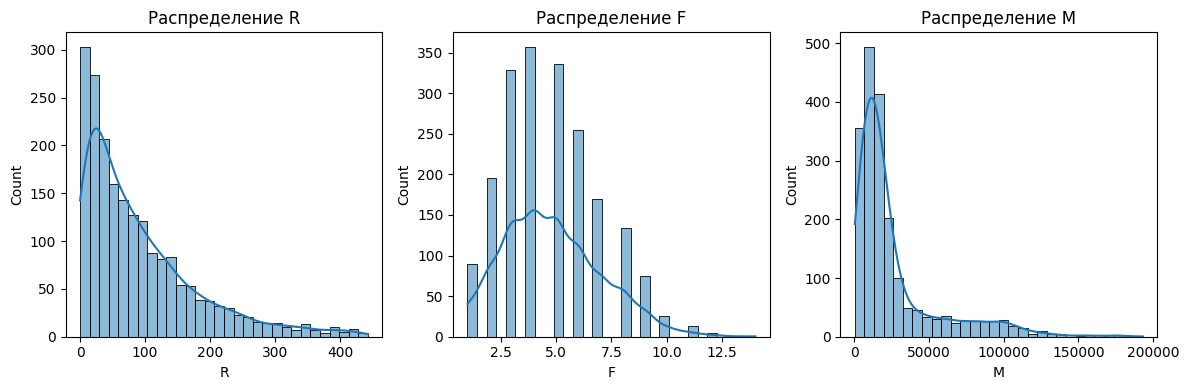

In [15]:
# визуализация 
plt.figure(figsize=(12, 4))
for i, col in enumerate(['R', 'F', 'M'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(rfm[col], bins=30, kde=True)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()